In [68]:
%load_ext autoreload
%autoreload
import os
from tqdm import tqdm
import numpy as np
from sklearn.preprocessing import normalize
import torch
import pandas as pd
from RS.utils.dataset import clusterting
from RS.utils.dataset import Dataset as Mydataset
from RS.MatrixFactorization import ALS_MF
from RS.utils.dictutils import *
from RS.utils.plotutils import plotLoss
dataroot = os.path.join("data")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
datafolder = {
    "training_user_course":os.path.join(
        dataroot,"course","train.csv"
    ),
    "training_user_book":os.path.join(
        dataroot,"book","user_cate3_train.csv"
    ),
    "testing_user_course":os.path.join(
        dataroot, "course", "test.csv"
    )
}


dataset = Mydataset(datafolder=datafolder)

build dataset
read training_user_course:data/course/train.csv
..OK
read training_user_book:data/book/user_cate3_train.csv
..OK
read testing_user_course:data/course/test.csv
..OK


In [20]:
user_course_all = pd.concat(
    [dataset.getdata("training_user_course"), 
    dataset.getdata("testing_user_course")], 
    axis=0
)
user_course_all.head()

uid  1011101  1011111  1011112  1011113  1011114  1011115  1011116  \
0  400110002      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1  400110003      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2  400110005      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3  400110006      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4  400110007      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   1011117  1011118  ...  7507019  7507020  7507021  7507022  7507023  \
0      0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   

   7507024  7507025  7507026  7507027  7507028  
0      0.0      0.0      0.0      0.0      0.0  
1      0.0      0.0      0.0      0.0      0.0  
2      0.0      0.0      0.0      0.0      0.0  
3      0.0      0.0      0.0      0.0      0.0  
4      0.0      0.0      0.0      0.0      0.0  

[5 rows x 7055 columns]

## Clustering

### Course spect

#### MF

random loss: 102.2179144330461


100%|██████████| 5/5 [00:08<00:00,  1.78s/it, currentbest=0.003, mse=0.003, improve=0.0000, early=2]  


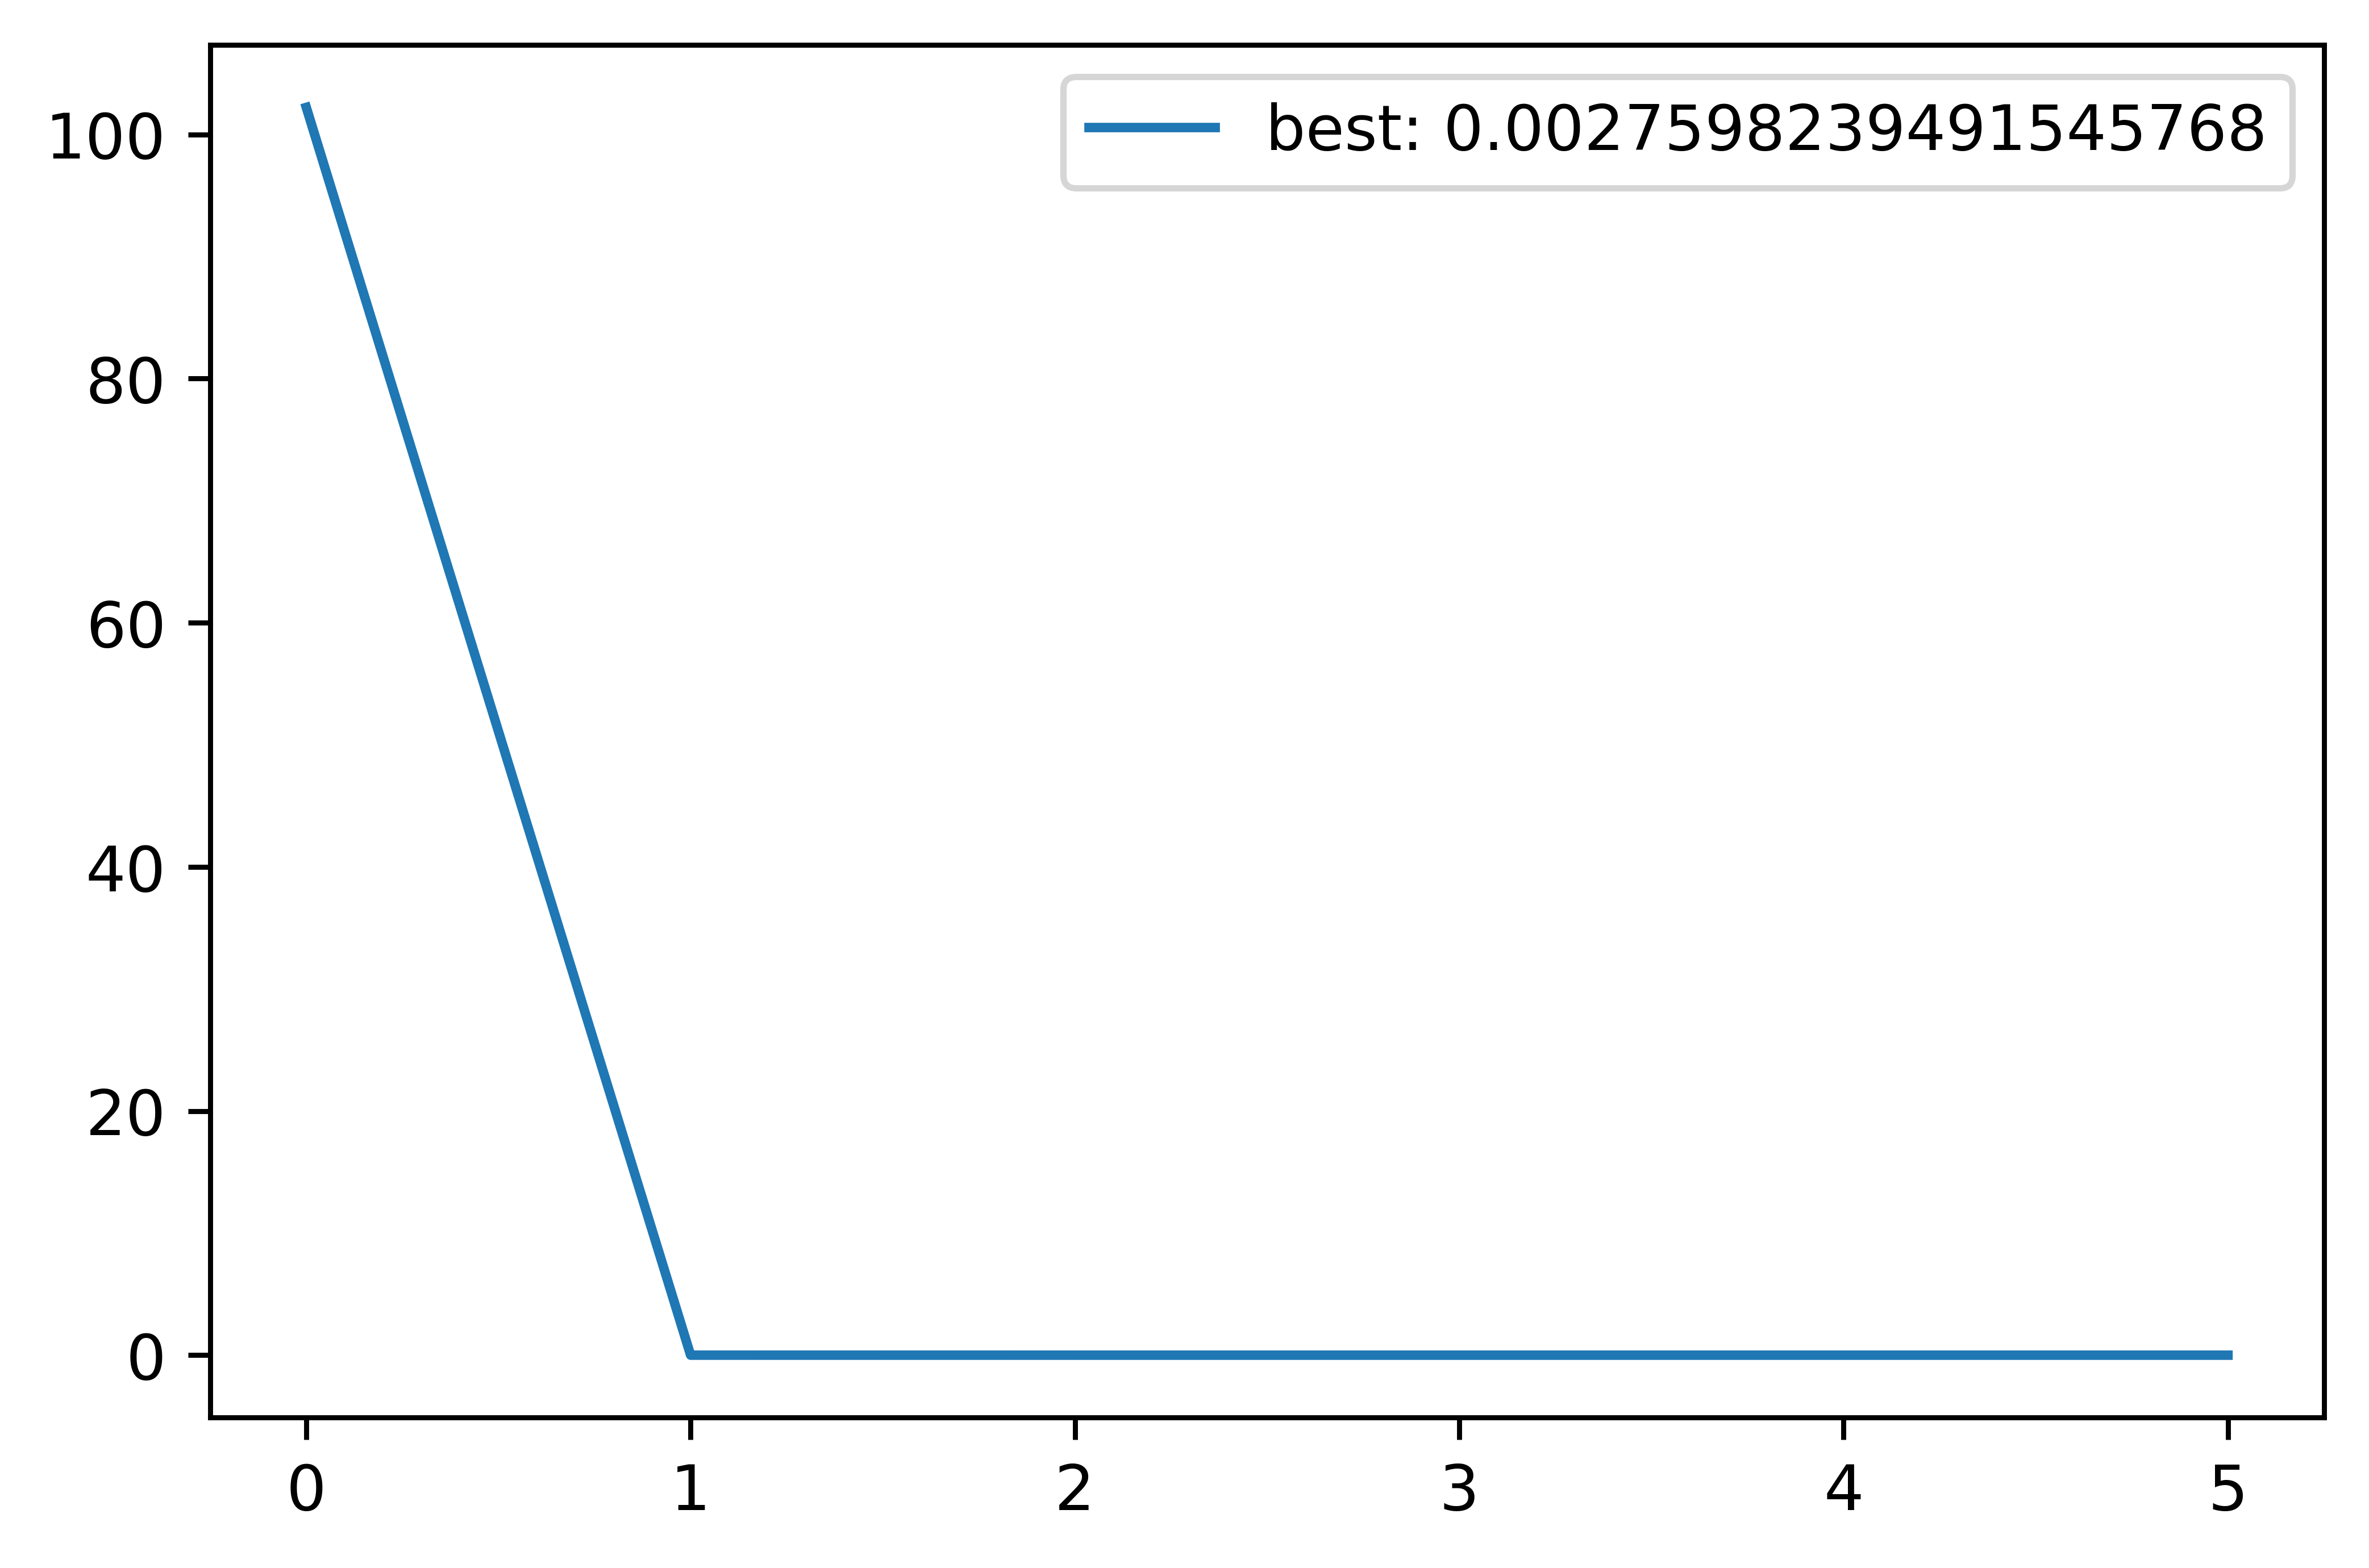

In [11]:
user_course_mf=ALS_MF(
    R = torch.tensor(
        user_course_all.drop(columns=['uid']).values
    )
)
h = user_course_mf.train(
    device=torch.device('cuda:4'),
    tmp_savepath=os.path.join(
        "result","CBMF","clustering", "coursedataset"
    )
)
plotLoss(
    loss=h['loss'], savename=os.path.join(
        "result","CBMF","clustering", "coursedataset", "mse.jpg"
    ),
    showinline=True
)

#### user clustering

(21829, 40)
clutsering ..
OK ..
visualization ..


/home/tch/.conda/envs/tenv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/tch/.conda/envs/tenv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


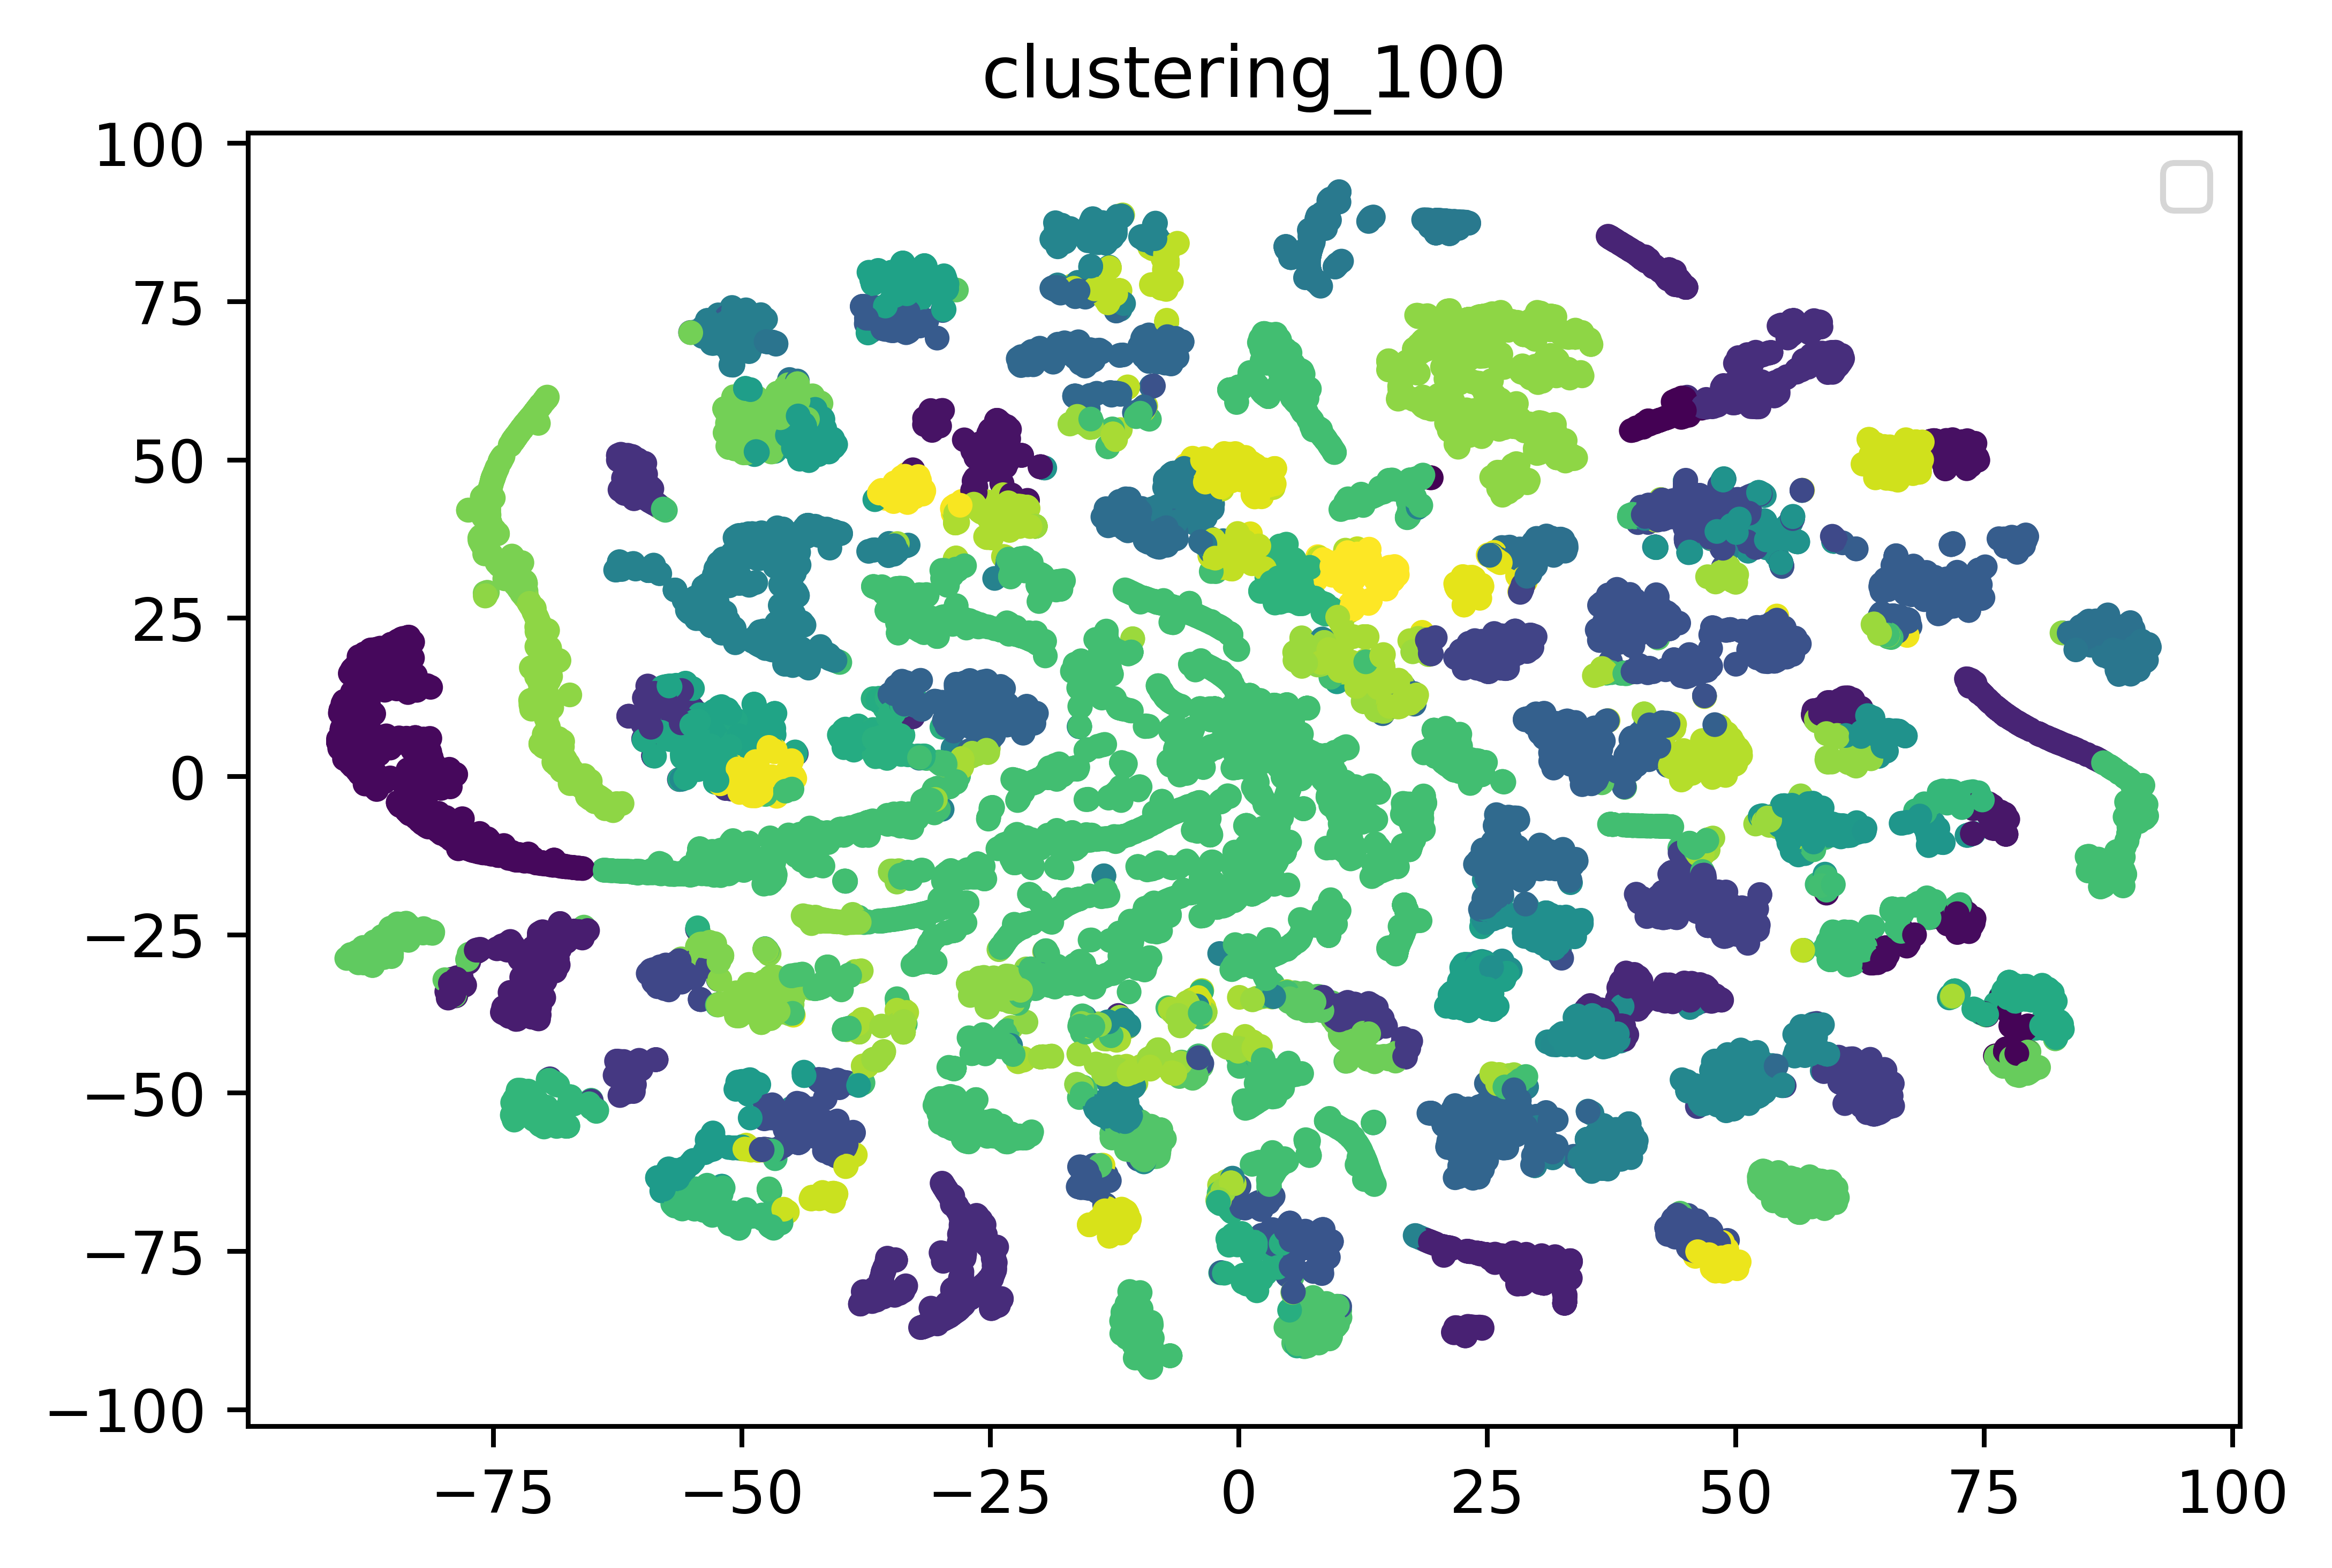

In [13]:
user_course_latency =torch.load( 
    os.path.join(
        "result","CBMF","clustering", "coursedataset", "user.pt"
    )
).cpu().numpy()
print(user_course_latency.shape)

user_coursespect_clustering = clusterting(
    items=user_course_all.uid.tolist(),
    x = user_course_latency,k=100,
    savingpath=os.path.join(
        "result","CBMF","clustering", "coursedataset", "userclusering"
    )
    ,visshow=True
)

#### course clustering

(7054, 40)
clutsering ..
OK ..
visualization ..


/home/tch/.conda/envs/tenv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/tch/.conda/envs/tenv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


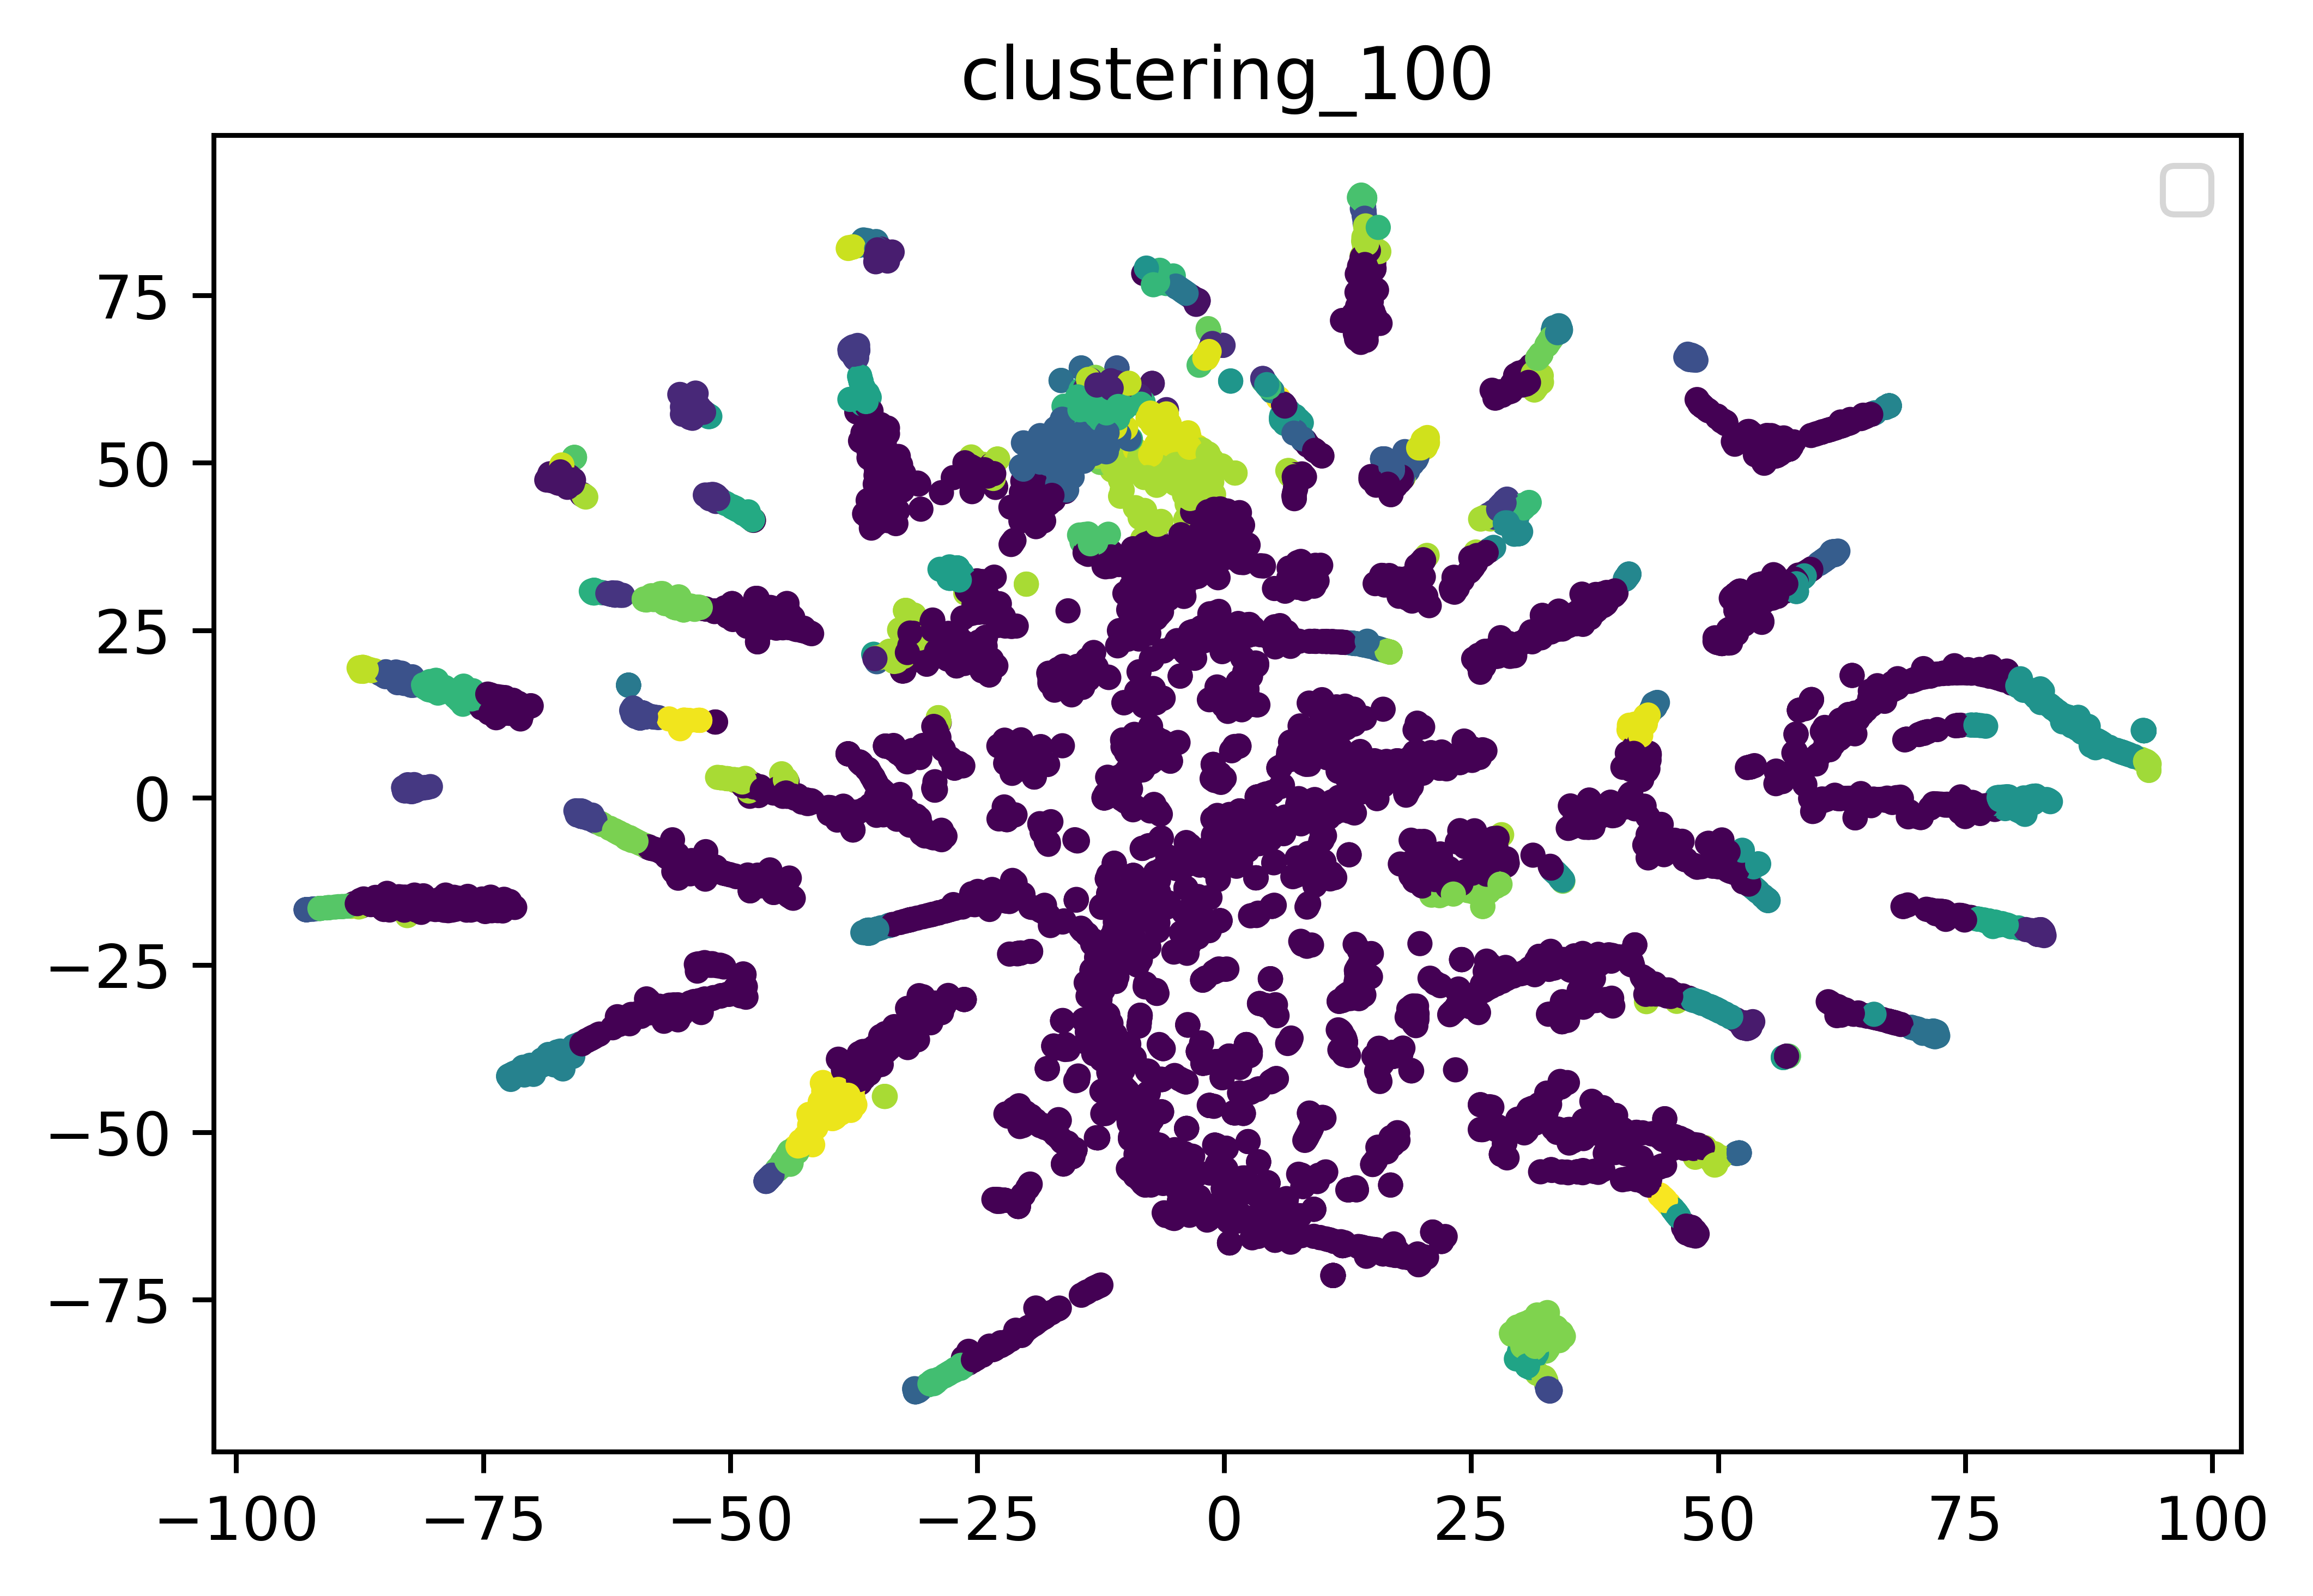

In [6]:
course_latency =torch.load( 
    os.path.join(
    "result","CBMF","clustering", "coursedataset", "item.pt"
    )
).cpu().numpy()
print(course_latency.shape)

user_coursespect_clustering = clusterting(
    items=user_course_all.drop(columns=['uid']).columns.tolist(),
    x = course_latency,k=100,
    savingpath=os.path.join(
        "result","CBMF","clustering", "coursedataset", "courseclustering"
    )
    ,visshow=True
)

### Book spect

In [7]:
user_book_train = dataset.getdata(
    dataname="training_user_book"
)
user_book_train.head()

uid    0    1    2    3    4    5    6    7    8  ...  990  991  992  \
0  400110002  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  400110003  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  400110005  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  400110006  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
4  400110007  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

   993  994  995  996  997  998  999  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 1001 columns]

#### MF

random loss: 102.01060803423574


100%|██████████| 5/5 [00:01<00:00,  3.37it/s, currentbest=0.105, mse=0.105, improve=0.0010, early=0]  


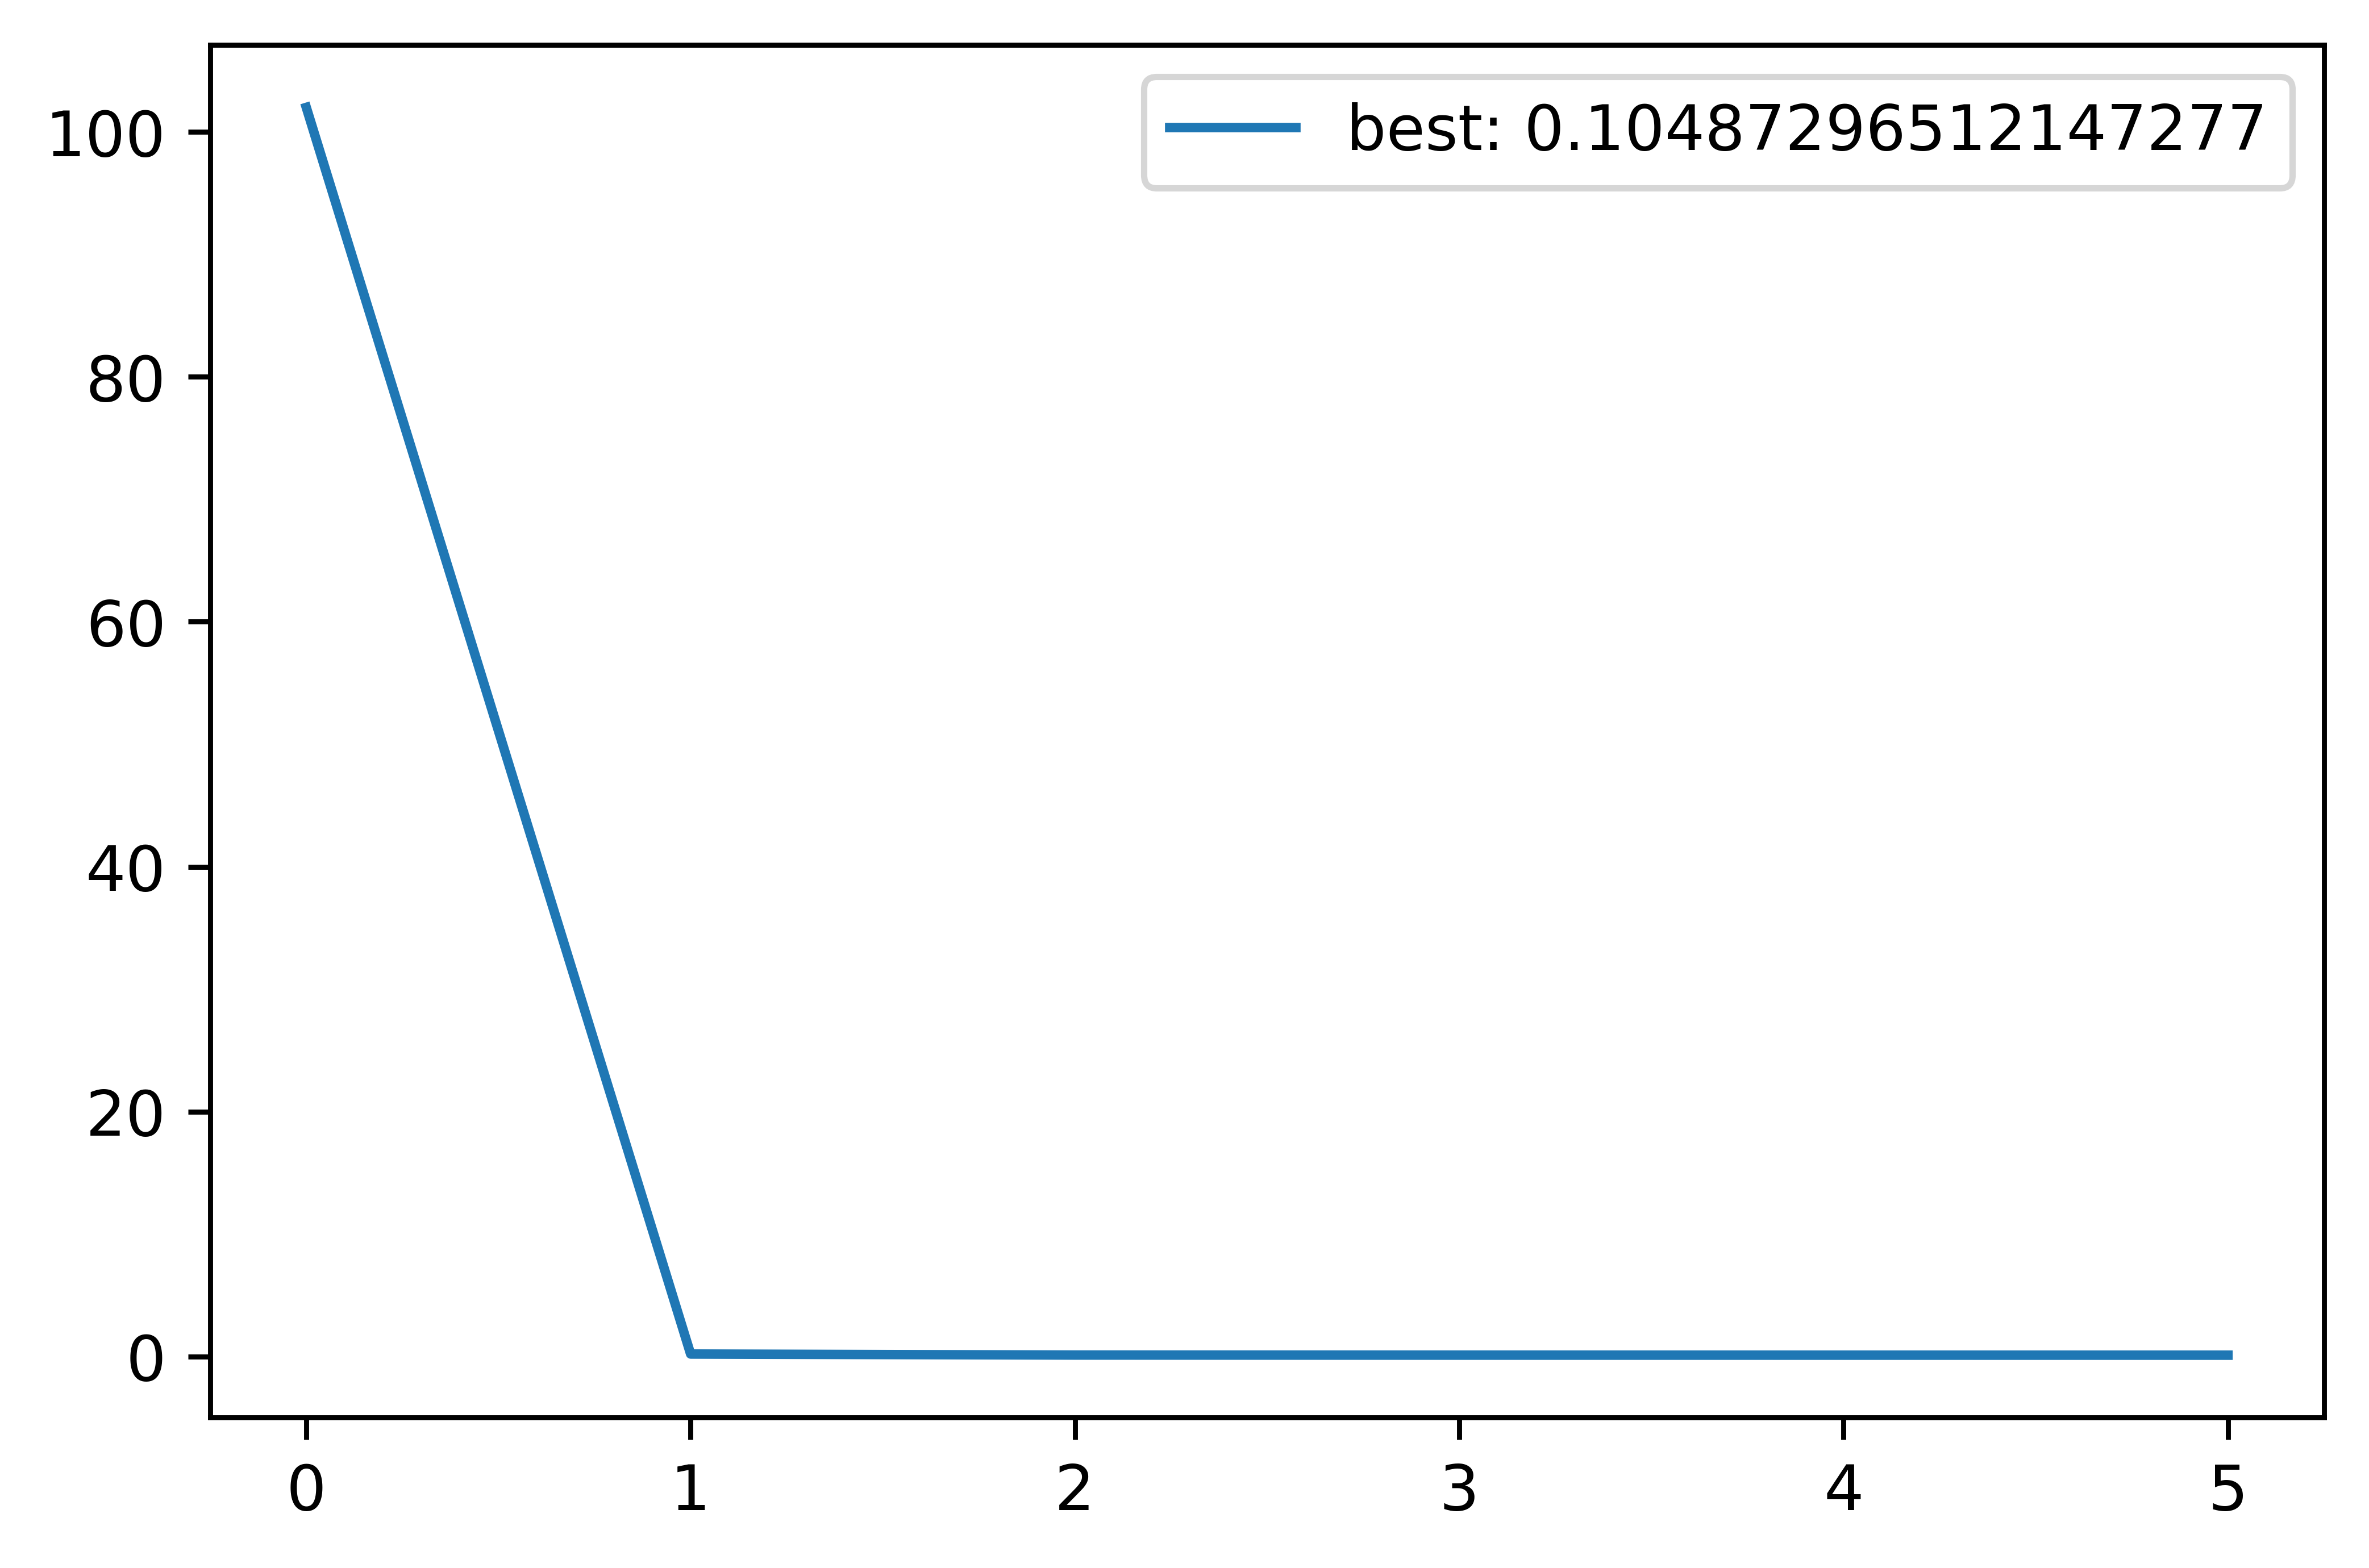

In [9]:
user_book_train_mf=ALS_MF(
    R = torch.tensor(
        user_book_train.drop(columns=['uid']).values
    )
)
h = user_book_train_mf.train(
    device=torch.device('cuda:4'),
    tmp_savepath=os.path.join(
        "result","CBMF","clustering", "bookdataset"
    )
)
plotLoss(
    loss=h['loss'], savename=os.path.join(
        "result","CBMF","clustering", "bookdataset", "mse.jpg"
    ),
    showinline=True
)

#### training user clustering

note that we treate testing users as a dependent cluster.

(20575, 40)
clutsering ..
OK ..
visualization ..


/home/tch/.conda/envs/tenv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/tch/.conda/envs/tenv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


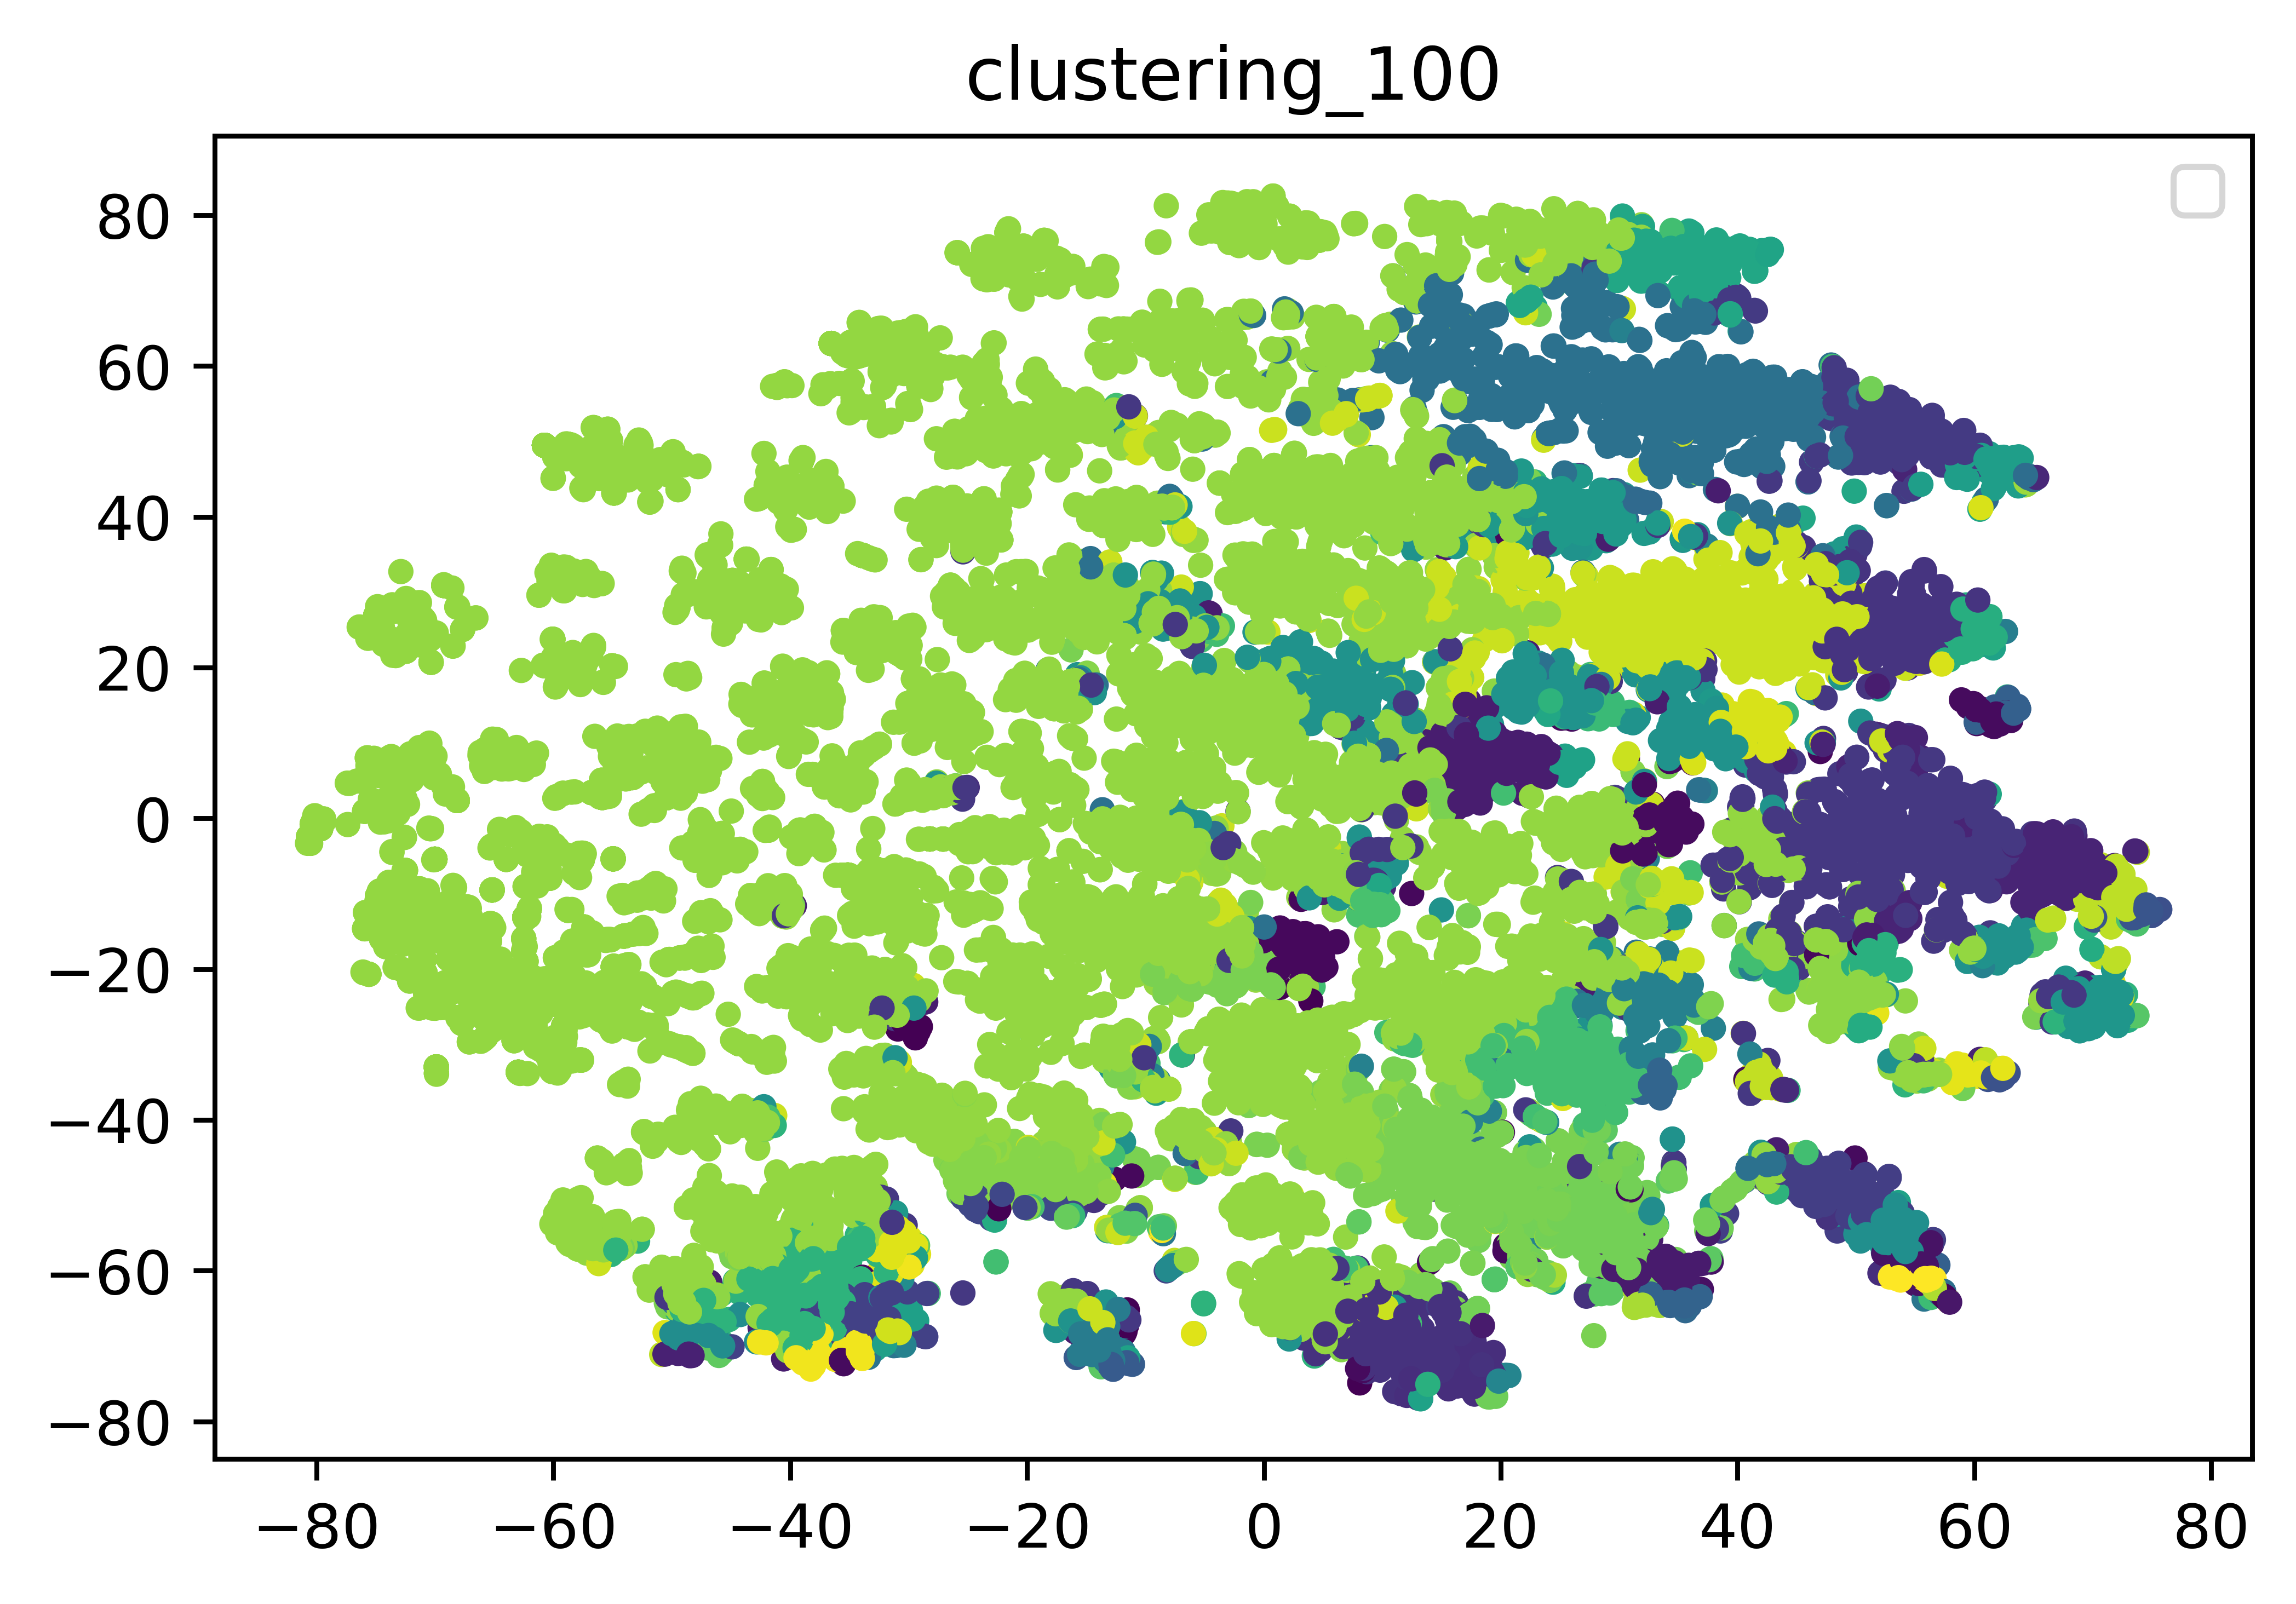

In [10]:
train_user_book_latency =torch.load( 
    os.path.join(
        "result","CBMF","clustering", "bookdataset", "user.pt"
    )
).numpy()
print(train_user_book_latency.shape)

user_bookspect_clustering = clusterting(
    items=user_book_train.uid.tolist(),
    x = train_user_book_latency,k=100,
    savingpath=os.path.join(
        "result","CBMF","clustering", "bookdataset", "userclusering"
    )
    ,visshow=True
)

#### book clustering

in our case, we using chinese library category
as clustering rule directly (layer3 )

## Cross domain cluster level matrix

In [ ]:
course_clustering = loadjson(
    os.path.join(
        "result","CBMF",
        "clustering","coursedataset",
        "courseclustering", "cluster.json"
    )
)

In [ ]:
user_book_train = dataset.getdata("training_user_book")
user_book_train.head()

### $\text{User}_\text{course}$

In [15]:
user_course_cluster = loadjson(
    os.path.join(
        "result","CBMF",
        "clustering","coursedataset",
        "userclustering", "cluster.json"
    )
)


In [64]:
course_course = np.zeros(
    (len(user_course_cluster.keys()), len(course_clustering.keys()))
)
course_course.shape

(100, 100)

In [65]:
z = 0
for uu, users in tqdm(user_course_cluster.items(), total= len(user_course_cluster.keys())):
    for cu, courses in  course_clustering.items():
        cb_sub=user_course_all[
            user_course_all['uid'].isin(users)
        ][courses]
        v = cb_sub.values
        obs_num = np.count_nonzero(v)
        if obs_num ==0:
            z +=1 
            course_course[int(uu)][int(cu)] = 0
        else:
            course_course[int(uu)][int(cu)] = np.sum(v)/obs_num
print(z)

100%|██████████| 100/100 [01:10<00:00,  1.42it/s]

2904


In [66]:
course_book = np.zeros(
    (len(user_course_cluster.keys()), 10)
)
course_book.shape

(100, 10)

In [67]:
z = 0
t = 0
for uu, users in tqdm(user_course_cluster.items(), total= len(user_course_cluster.keys())):
    for i in range(10):
        t+=1
        cate_cluster= list(str(ci) for ci in range(i,i+100))
        cb_sub=user_book_train[
            user_book_train['uid'].isin(users)
        ][cate_cluster]
        v = cb_sub.values
        obs_num = np.count_nonzero(v)
        if obs_num < 5:
            z +=1 
            course_book[int(uu)][i] = 0
        else:
            course_book[int(uu)][i] = np.sum(v)/obs_num
print(z)
print(t)

100%|██████████| 100/100 [00:01<00:00, 51.23it/s]

64
1000


In [69]:
course_book = normalize(
    course_book, axis=1, norm="l1"
)

In [70]:
course_crossdomain = np.concatenate(
    (course_course ,course_book) , axis = 1
)
course_crossdomain.shape

(100, 110)

In [71]:
np.save(
    os.path.join("result", "CBMF" ,"clustering","course_crossdomain"),
    course_crossdomain
)

### $\text{User}_\text{book}$

In [46]:
user_book_cluster = loadjson(
    os.path.join(
        "result","CBMF",
        "clustering","bookdataset",
        "userclustering", "cluster.json"
    )
)
cnum=len(user_book_cluster.keys())

In [47]:
user_book_cluster[cnum]=(
    pd.read_csv(
        os.path.join(dataroot, "book","user_cate3_test.csv")
    ).uid.tolist()
)

In [52]:
book_course = np.zeros(
    (len(user_book_cluster.keys()), len(course_clustering.keys()))
)
book_course.shape

(101, 100)

In [54]:
t=0
z = 0
for uu, users in tqdm(user_book_cluster.items(), total= len(user_book_cluster.keys())):
    for cu, courses in course_clustering.items():
        t+=1
        cb_sub=user_course_all[
            user_course_all['uid'].isin(users)
        ][courses]
        v = cb_sub.values
        obs_num = np.count_nonzero(v)
        if obs_num ==0:
            z +=1 
            book_course[int(uu)][int(cu)] = 0
        else:
            book_course[int(uu)][int(cu)] = np.sum(v)/obs_num
print(z)
print(t)

100%|██████████| 101/101 [01:34<00:00,  1.07it/s]

5255
10100


In [55]:
book_book = np.zeros((len(user_book_cluster.keys()), 10))
book_book.shape

(101, 10)

In [73]:
z = 0
t = 0
total = len(user_book_cluster.keys())
for uu, users in tqdm(user_book_cluster.items(), total=total):
    
    if int(uu) == (total-1):
        """
        testing user's cluster
        """
        continue

    for i in range(10):
        t+=1
        cate_cluster= list(str(ci) for ci in range(i,i+100))
        cb_sub=user_book_train[
            user_book_train['uid'].isin(users)
        ][cate_cluster]
        v = cb_sub.values
        obs_num = np.count_nonzero(v)
        if obs_num < 5:
            z +=1 
            book_book[int(uu)][i] = 0
        else:
            book_book[int(uu)][i] = np.sum(v)/obs_num
print(z)
print(t)

100%|██████████| 101/101 [00:02<00:00, 44.55it/s]

102
1000


In [74]:
book_book = normalize(
    book_book, axis=1, norm="l1"
)

In [75]:
book_crossdomain = np.concatenate(
    (book_course, book_book), axis = 1
)
book_crossdomain.shape

(101, 110)

In [76]:
np.save(
    os.path.join("result", "CBMF" ,"clustering","book_crossdomain"),
    book_crossdomain
)

### Combine both

In [77]:
ClusterCrossdomain = np.concatenate(
    (course_crossdomain, book_crossdomain), axis=0
)
ClusterCrossdomain.shape

(201, 110)

In [78]:
np.save(
    os.path.join("result", "CBMF" ,"clustering","cb"),
    ClusterCrossdomain
)